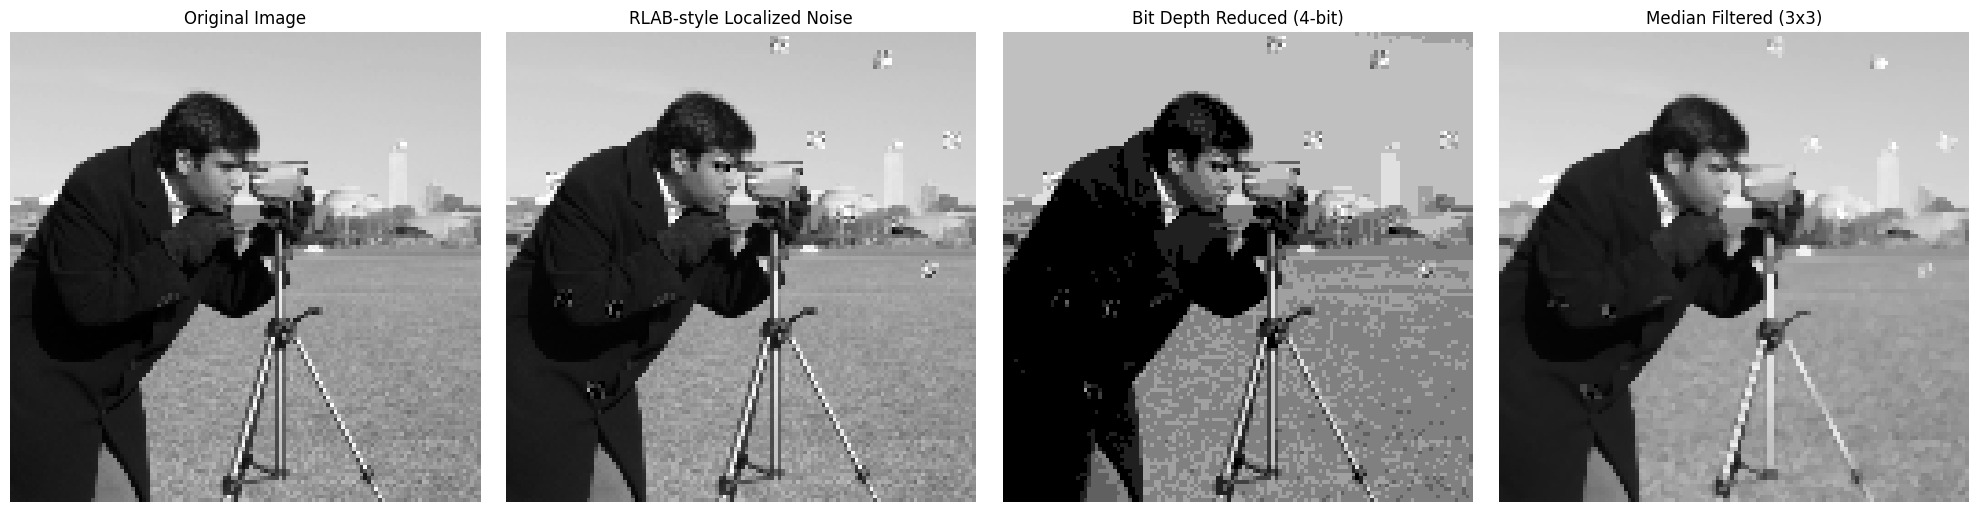

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from scipy.ndimage import median_filter
import cv2

image = img_as_float(data.camera())
image = cv2.resize(image, (128, 128))
def add_localized_gaussian_noise(img, patch_size=5, num_patches=12, std=0.2):
    noisy_img = img.copy()
    h, w = img.shape
    for _ in range(num_patches):
        x = np.random.randint(0, h - patch_size)
        y = np.random.randint(0, w - patch_size)
        noise = np.random.normal(0, std, (patch_size, patch_size))
        noisy_img[x:x+patch_size, y:y+patch_size] = np.clip(
            noisy_img[x:x+patch_size, y:y+patch_size] + noise, 0, 1)
    return noisy_img

rlab_noisy = add_localized_gaussian_noise(image)
def reduce_bit_depth_gray(img, bits=3):
    levels = 2 ** bits
    squeezed = np.floor(img * levels) / levels
    return squeezed

bit_reduced = reduce_bit_depth_gray(rlab_noisy)
def apply_median_filter_gray(img, kernel_size=2):
    return median_filter(img, size=kernel_size)

median_filtered = apply_median_filter_gray(rlab_noisy)

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(rlab_noisy, cmap='gray')
axs[1].set_title('RLAB-style Localized Noise')
axs[1].axis('off')

axs[2].imshow(bit_reduced, cmap='gray')
axs[2].set_title('Bit Depth Reduced (4-bit)')
axs[2].axis('off')

axs[3].imshow(median_filtered, cmap='gray')
axs[3].set_title('Median Filtered (3x3)')
axs[3].axis('off')

plt.tight_layout()
plt.show()


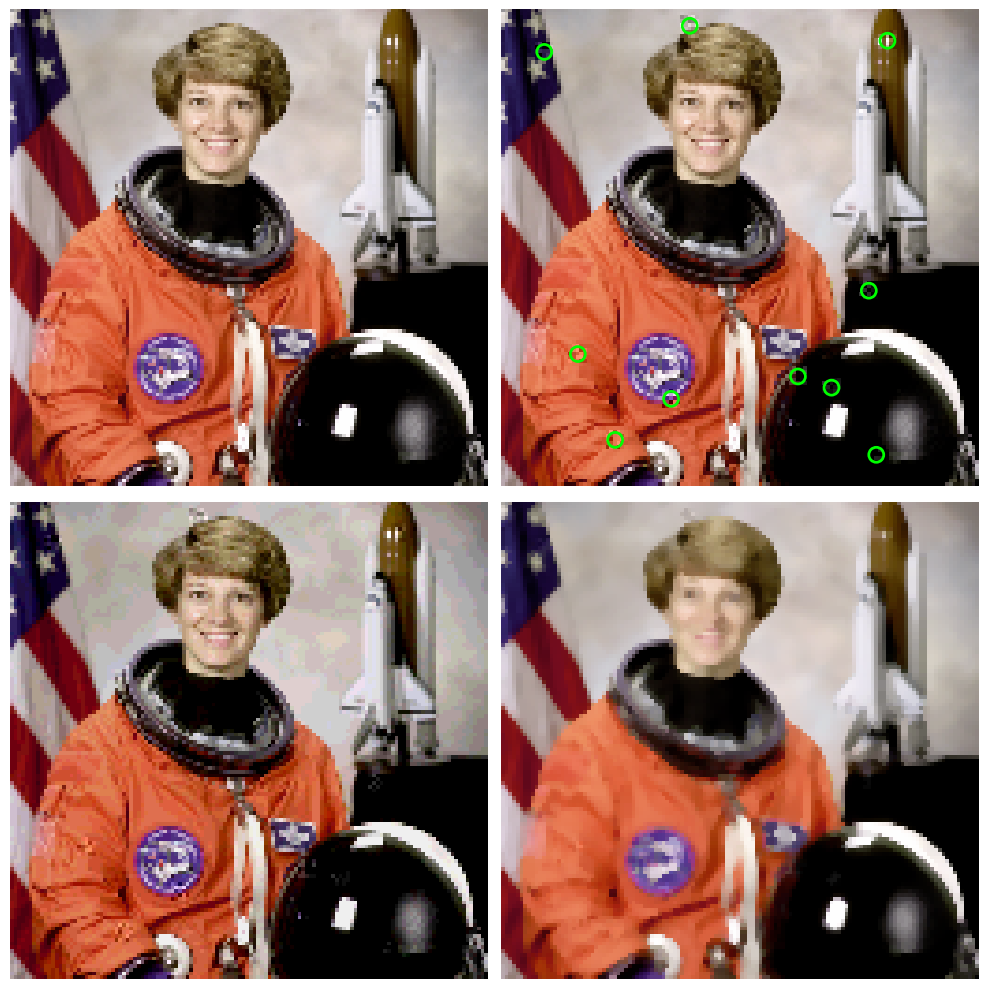

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from scipy.ndimage import median_filter
import cv2
from matplotlib.patches import Circle

image = img_as_float(data.astronaut())
image = cv2.resize(image, (128, 128))

def add_gray_patch_noise_with_locs(img, patch_size=5, num_patches=10, std=0.12):
    noisy_img = img.copy()
    h, w, _ = img.shape
    locations = []

    for _ in range(num_patches):
        x = np.random.randint(0, h - patch_size)
        y = np.random.randint(0, w - patch_size)

        gray_noise = np.random.normal(0, std, (patch_size, patch_size))
        gray_noise = np.clip(gray_noise, -1, 1)

        for c in range(3):
            noisy_img[x:x+patch_size, y:y+patch_size, c] = np.clip(
                noisy_img[x:x+patch_size, y:y+patch_size, c] + gray_noise, 0, 1)

        locations.append((x + patch_size//2, y + patch_size//2, patch_size//2))

    return noisy_img, locations

rlab_noisy, patch_locs = add_gray_patch_noise_with_locs(image)

def reduce_bit_depth_color(img, bits=4):
    levels = 2 ** bits
    return np.floor(img * levels) / levels

bit_reduced = reduce_bit_depth_color(rlab_noisy)

def apply_median_filter_color(img, kernel_size=3):
    filtered = np.zeros_like(img)
    for c in range(img.shape[2]):
        filtered[:, :, c] = median_filter(img[:, :, c], size=kernel_size)
    return filtered

median_filtered = apply_median_filter_color(rlab_noisy)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(image)
axs[0, 0].axis('off')

axs[0, 1].imshow(rlab_noisy)
for (x, y, r) in patch_locs:
    circ = Circle((y, x), r, edgecolor='lime', facecolor='none', linewidth=2)
    axs[0, 1].add_patch(circ)
axs[0, 1].axis('off')
axs[1, 0].imshow(bit_reduced)
axs[1, 0].axis('off')
axs[1, 1].imshow(median_filtered)
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()
